# Predicting Customer Satisfaction

## Research question
*Which product and order characteristics have an effect on the reviewscore of customers?* 

#### Background information about the project
The technical requirements for this project are as follows:
- Come up with an interesting research question and find data to answer your question.  
- Create a Jupyter notebook or Python file to analyze the data.
- Using your data, create a minimum of:
    - one scatter plot
    - one histogram
    - one box plot
    - one bar graph (you can add more than one visualization of each type of you choose). 
 
- Your plots should contain:
     - proper labeling of the x and y axis 
     - proper units of the quantities plotted (if applicable) 
     - a title for the graph.

- Feel free to use matplotlib, seaborn, or plotly as you see fit to best convey the message and the story behind the data.

- Using a SQL DB is recommended but not mandatory.

#### Download the dataset
Please download the dataset from [here](https://drive.google.com/drive/folders/1oloDFYd_pfjiEuVFj9WuALfKh9mo3g3Z?usp=sharing) and place it in the data folder. It consists of 5 csv files. This Google Drive folder consist an ecommerce public dataset of orders made at the Brazilian [Olist Store](https://olist.com/). Please download the image of the database schema as well.

#### Context about the data
The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. One of the datasets contains geolocation data that relates Brazilian zip codes to lat/lng coordinates.

#### Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Import datasets

In [2]:
order_items = pd.read_csv('..\\data\\olist_order_items_dataset.csv')
order_payments = pd.read_csv('..\\data\\olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('..\\data\\olist_order_reviews_dataset.csv')
orders = pd.read_csv('..\\data\\olist_orders_dataset.csv')
products = pd.read_csv('..\\data\\olist_products_dataset.csv')

#### Cohesion between the different csv files
As can be seen in the image below, the different csv files can be joined on variables.

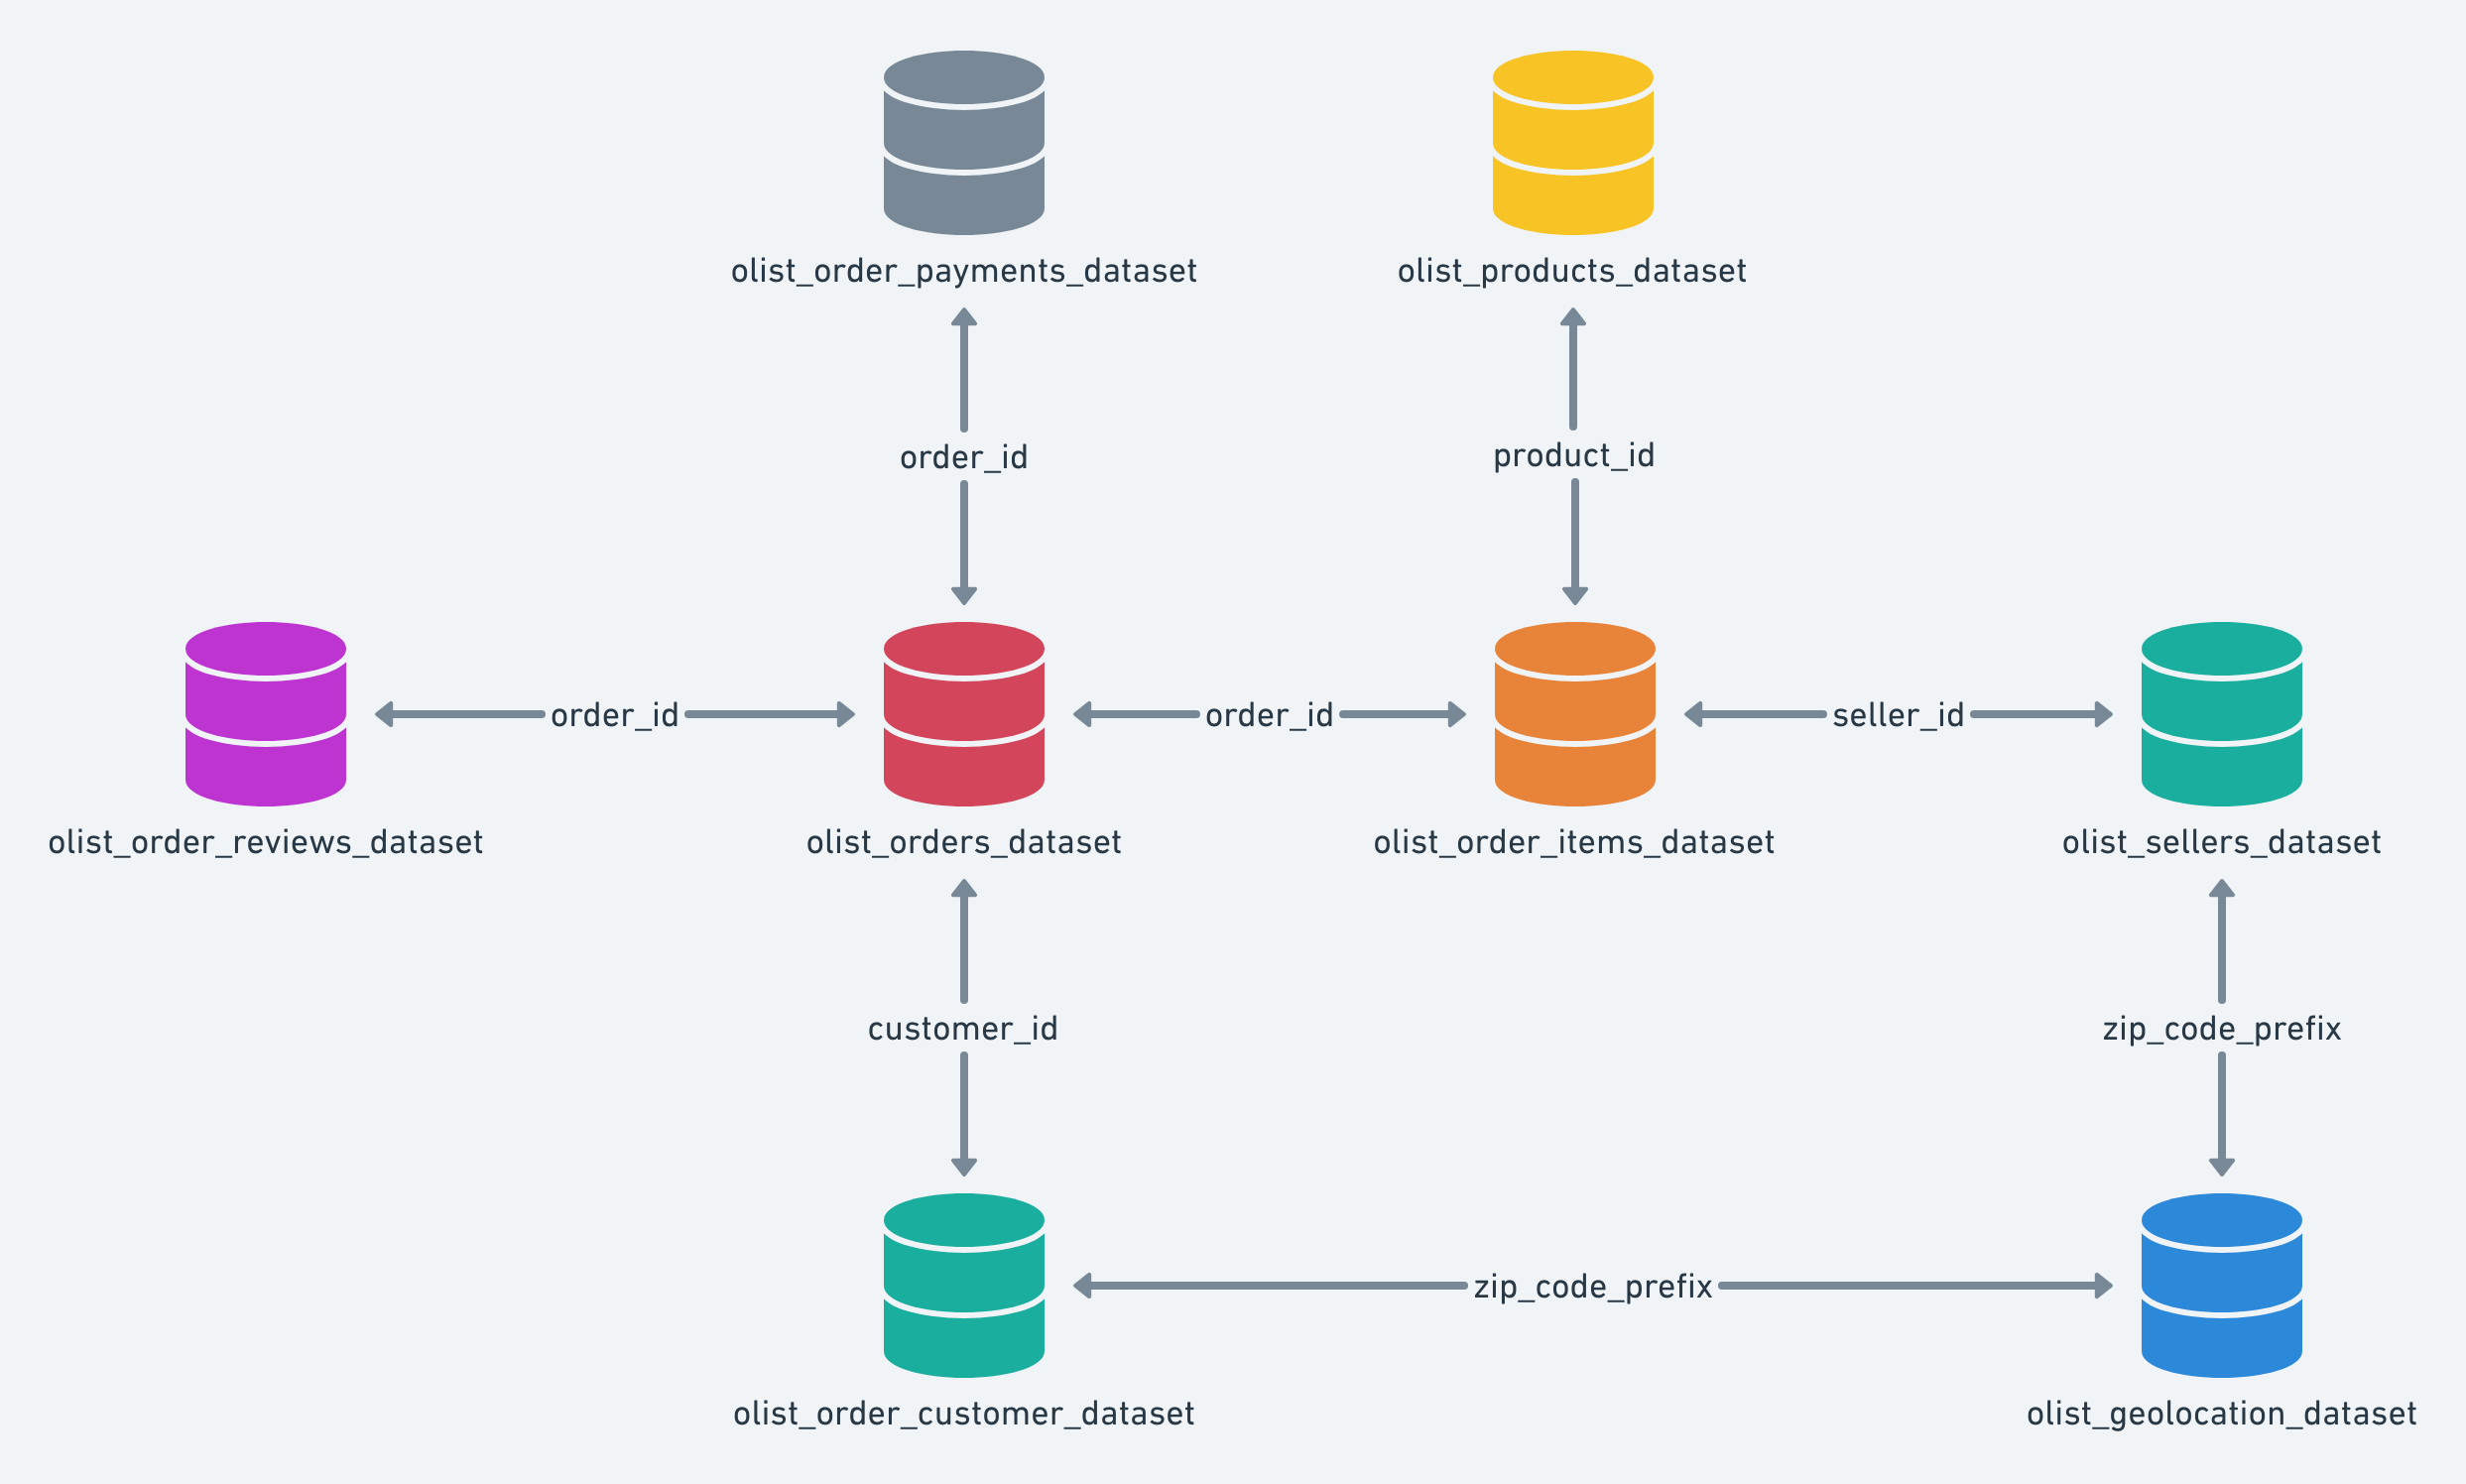

## Start of analysis
General insights about Olist and the dataset.

#### Conclusions
1. The average value per order is 140 BRL (21 EUR)
2. The frequency distribution of the value per order is positively skewed, which means customers place a lot of orders with a relatively small value.
3. The total order value per month has increased a lot since 2016. 
5. The average value per order is stable around 140 BRL and has barely increased over time.
4. In 2018, the average (total) order value per month was around 1mio BRL. This has incread a lot since 2016, which probably means the number of orders increased a lot.

#### Frequency distribution of value per order

The average order value per order is 140.86839996937866


Text(0, 0.5, 'Count (frequency)')

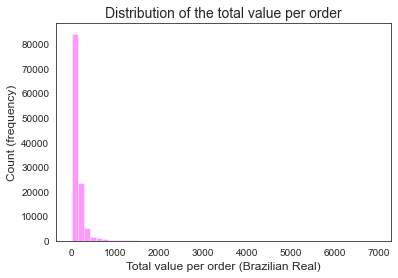

In [3]:
#merge relevant csv files: order items and order payments
orders_orderitems = orders.merge(order_items, on='order_id', how='left')
orders_orderitems = orders_orderitems.merge(order_payments, on='order_id', how='left')

#create extra column to calculate the total price of the order: item and shipping cost
orders_orderitems['total_price'] = orders_orderitems['price'] + orders_orderitems['freight_value']

#find unique orders
unique_order_ids = orders_orderitems['order_id'].unique()
unique_orders = orders_orderitems.loc[orders_orderitems['order_id'].isin(unique_order_ids)]

#Average order value per order
print('The average order value per order is', unique_orders['total_price'].mean())

#create a histogram for the frequency distribution of total value per order
sns.set_style("white")
plt.plot(figsize=(15,5))
sns.distplot(unique_orders['total_price'], kde=False, color='magenta')
plt.title('Distribution of the total value per order', fontsize=14)
plt.xlabel('Total value per order (Brazilian Real)', fontsize=12)
plt.ylabel('Count (frequency)', fontsize=12)

#### Total order value of all orders together per month and year

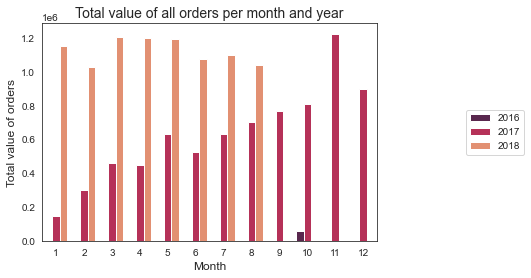

In [4]:
#transform order_purchase_timestamp to date/time
unique_orders.order_purchase_timestamp = pd.to_datetime(unique_orders.order_purchase_timestamp)

#create year and month columns
unique_orders['month'] = unique_orders['order_purchase_timestamp'].dt.month
unique_orders['year'] = unique_orders['order_purchase_timestamp'].dt.year

#create a bar plot for total value order per month and year
sns.set_style("white")
plt.plot(figsize=(10,30))
sns.barplot(x="month", y='total_price', hue='year', data=unique_orders, estimator=sum, palette='rocket', ci=None)
plt.title('Total value of all orders per month and year', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total value of orders', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

#### Average order value per month and year

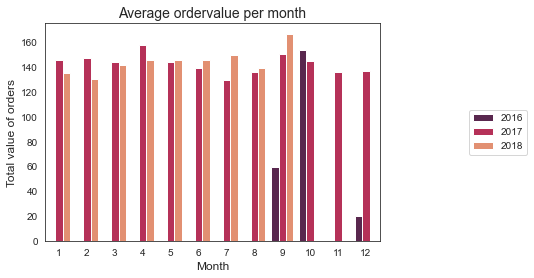

In [5]:
#create a bar plot for average order value per month and year
sns.set_style("white")
plt.plot(figsize=(10,30))
sns.barplot(x="month", y='total_price', hue='year', data=unique_orders, palette='rocket', ci=None)
plt.title('Average ordervalue per month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total value of orders', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Text(0, 0.5, 'Count (frequency)')

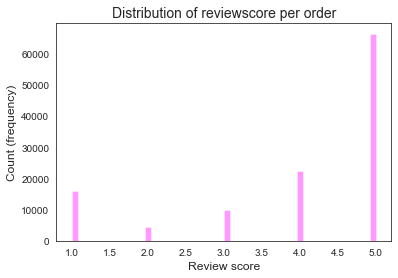

In [6]:
#join with orders review csv
unique_orders_review = unique_orders.merge(order_reviews, on='order_id', how='left')

#create frequency distribution of the review score per item
sns.set_style("white")
plt.plot(figsize=(15,5))
sns.distplot(unique_orders_review['review_score'], kde=False, color='magenta')
plt.title('Distribution of reviewscore per order', fontsize=14)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Count (frequency)', fontsize=12)

## Testing hypotheses
1. The value of the order influences the review score
2. The time difference between estimated and actual delivery time influences the review score
3. Whether the delivery is early, on time or late influences the review score
4. Lenght of the product description influences the review score
5. Number of photos per item influences the review score
6. Timing of review influences the review score

### Hypothesis 1: The value of the order influences the review score
The assumption is that a higher order value leads to more critical customers and thus lower review scores.

#### Conclusion
Orders with a higher order values are more likely to receive higher review scores. But, more expensive items could be of better quality, or perceived as better products by the customers.

Text(-1.6999999999999993, 0.5, 'Order value')

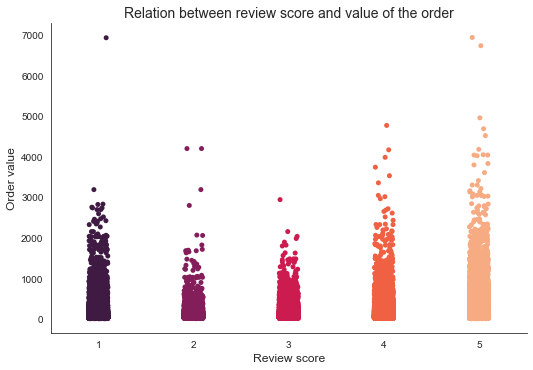

In [7]:
#merge relevant csv files: order items, order payments and order reviews
orders_orderitems = orders.merge(order_items, on='order_id', how='left')
orders_orderitems = orders_orderitems.merge(order_payments, on='order_id', how='left')

#create extra column to calculate the total price of the order: item and shipping cost
orders_orderitems['total_price'] = orders_orderitems['price'] + orders_orderitems['freight_value']

#only include unique orders
unique_order_ids = orders_orderitems['order_id'].unique()
unique_orders = orders_orderitems.loc[orders_orderitems['order_id'].isin(unique_order_ids)]

#merge with csv orders review
unique_orders_review = unique_orders.merge(order_reviews, on='order_id', how='left')

#create a catplot to examine the relation between order values and review score
sns.set_style("white")
sns.catplot(data=unique_orders_review, x="review_score", y="total_price", height=5, aspect=1.5, palette="rocket")
plt.title('Relation between review score and value of the order', fontsize=14)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Order value', fontsize=12)

Text(0, 0.5, 'Order value')

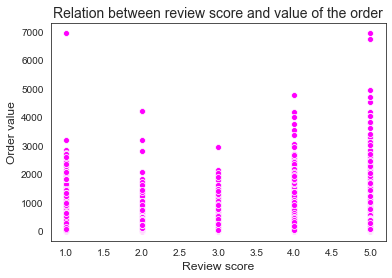

In [8]:
#create a scatterplot to examine the relation between order values and review score
sns.set_style("white")
sns.scatterplot(data=unique_orders_review, x="review_score", y="total_price", color='magenta')
plt.title('Relation between review score and value of the order', fontsize=14)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Order value', fontsize=12)

### Hypothesis 2: The time difference between estimated and actual delivery time influences the review score
The assumption is that a higher time difference leads to lower review scores.

#### Conclusion
The time difference (in days) between the estimated and actual delivery date doesn’t seem to have an effect on the review score.

In [9]:
#only include unique orders
unique_order_ids = orders_orderitems['order_id'].unique()
unique_orders = orders_orderitems.loc[orders_orderitems['order_id'].isin(unique_order_ids)]

#transform order_delivered_customer_date to date/time
unique_orders.order_delivered_customer_date = pd.to_datetime(unique_orders.order_delivered_customer_date)

#transform order_estimated_delivery_date to date/time
unique_orders.order_estimated_delivery_date = pd.to_datetime(unique_orders.order_estimated_delivery_date)

#creating extra column with only delivery dates, not timestamp
unique_orders['order_delivered_customer_date_only'] = unique_orders['order_delivered_customer_date'].dt.normalize()

#creating extra column with the time difference between'order_delivered_customer_date' and 'order_estimated_delivery_date'
#how to interpret the outcome: delivere date minus estimated date = 
    #positive means actual delivery EARLIER than expected
    #negative means actual delivery LATER than expected
unique_orders['timedifference_delivery'] = unique_orders['order_estimated_delivery_date'] - unique_orders['order_delivered_customer_date_only']

#convert 'timedifference_delivery' to days
unique_orders['timedifference_delivery'] = (unique_orders['timedifference_delivery'].dt.days)

#removing outliers
#IQR is Q3 (75%) - Q1 (25%) 
iqr = (unique_orders['timedifference_delivery'].quantile(0.75)) - (unique_orders['timedifference_delivery'].quantile(0.25))

#determine lower and upper bound
lower_bound = ((unique_orders['timedifference_delivery'].quantile(0.25)) - 1.5 * iqr)
upper_bound = ((unique_orders['timedifference_delivery'].quantile(0.75)) + 1.5 * iqr)

#filter where 'timedifference_delivery' is between -8 and 32
unique_orders_filterd = unique_orders[(unique_orders['timedifference_delivery'] > lower_bound) & (unique_orders['timedifference_delivery'] < upper_bound)]

#join csv files 'orders' and 'order_reviews' with a left join
orders_and_reviews = unique_orders_filterd.merge(order_reviews, on='order_id', how='left')

#check if there are NaN values in the review score
orders_and_reviews['review_score'].isnull().sum()

0

Text(0, 0.5, 'Count (frequency)')

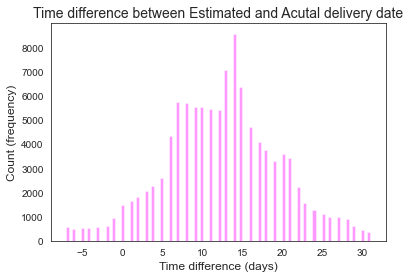

In [10]:
#create a histogram for the frequency distribution of time difference
sns.set_style("white")
plt.plot(figsize=(10,5))
sns.distplot(unique_orders_filterd['timedifference_delivery'], kde=False, color='magenta', bins=100)
plt.title('Time difference between Estimated and Acutal delivery date', fontsize=14)
plt.xlabel('Time difference (days)', fontsize=12)
plt.ylabel('Count (frequency)', fontsize=12)

Text(9.3, 0.5, 'Time difference (days)')

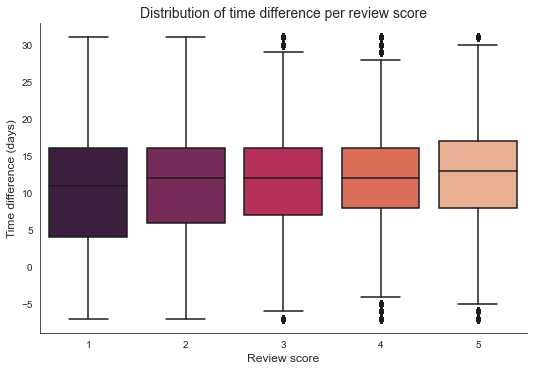

In [11]:
#create a boxplot to examine the distribution of time difference per review score
sns.set_style("white")
sns.catplot(x="review_score", y="timedifference_delivery", kind="box", data=orders_and_reviews, height=5, aspect=1.5, palette="rocket")
plt.title('Distribution of time difference per review score', fontsize=14)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Time difference (days)', fontsize=12)

### Hypothesis 3: Whether the delivery is early, on time or late influences the review score
The assumption is that an early delivery leads to higher review scores, while a late delivery leads to lower review scores.

#### Conclusion
When the time difference of delivery is categorized to 'Early', 'On time' and 'Late', there seems to be a (weak) relationship. Late delivery is more likely to have a lower review score. Early delivery is more likely to have a higher review score.

Text(6.800000000000001, 0.5, 'Review score')

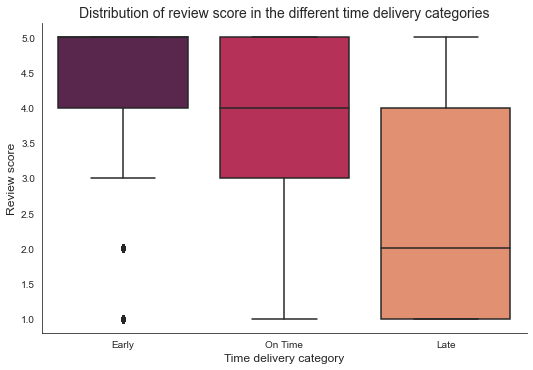

In [12]:
#create an extra column: early, on time, late
orders_and_reviews['in_time'] = ['On Time' if x == 0 else 'Late' if x < 0 else 'Early' for x in orders_and_reviews['timedifference_delivery']]

#create a boxplot to examine the distribution of review score per time category
sns.set_style("white")
sns.catplot(x="in_time", y="review_score", kind="box", data=orders_and_reviews, height=5, aspect=1.5, palette="rocket")
plt.title('Distribution of review score in the different time delivery categories', fontsize=14)
plt.xlabel('Time delivery category', fontsize=12)
plt.ylabel('Review score', fontsize=12)

### Hypothesis 4: Lenght of the product description influences the review score
The assumption is that a longer description gives more information about the product and customers know better what to expect, thus resulting in a higher review score.

#### Conclusion
There seems to be no relationship between the description lenght of a product and the review score.

Text(-1.6999999999999993, 0.5, 'Lenght of product description')

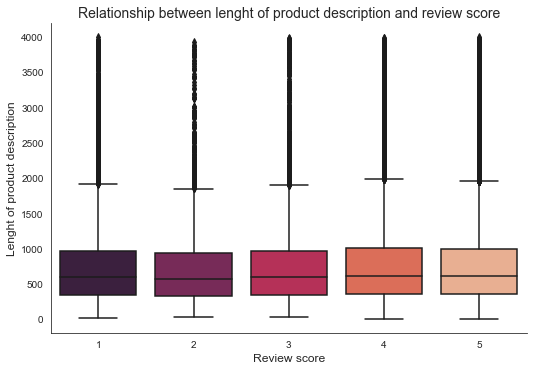

In [13]:
#Merge csv files
characteristics_reviews = order_reviews.merge(orders, on='order_id', how='left')
characteristics_reviews = characteristics_reviews.merge(order_items, on='order_id', how='left')
characteristics_reviews = characteristics_reviews.merge(products,on='product_id', how='left')

#Filter unique orders
unique_order_ids = characteristics_reviews['order_id'].unique()
unique_orders = characteristics_reviews.loc[characteristics_reviews['order_id'].isin(unique_order_ids)]

#create a boxplot to examine the distribution of review score per time category
sns.set_style("white")
sns.catplot(data=unique_orders, x="review_score", y="product_description_lenght", kind="box", height=5, aspect=1.5, palette="rocket")
plt.title('Relationship between lenght of product description and review score', fontsize=14)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Lenght of product description', fontsize=12)

Text(-1.6999999999999993, 0.5, 'Lenght of product description')

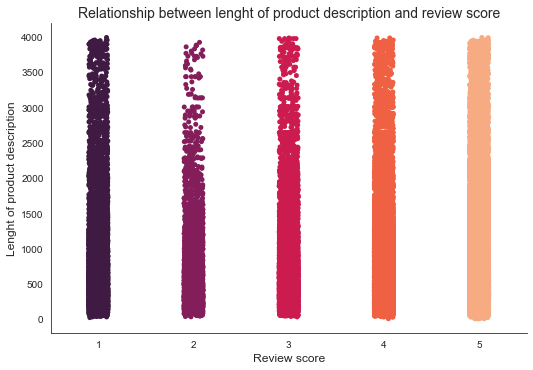

In [14]:
#create a catplot to investigate a bit further
sns.set_style("white")
sns.catplot(data=unique_orders, x="review_score", y="product_description_lenght", height=5, aspect=1.5, palette="rocket")
plt.title('Relationship between lenght of product description and review score', fontsize=14)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Lenght of product description', fontsize=12)

In [15]:
#removing outliers
#IQR is Q3 (75%) - Q1 (25%) 
iqr = (unique_orders['product_description_lenght'].quantile(0.75)) - (unique_orders['product_description_lenght'].quantile(0.25))

#determine lower and upper bound
lower_bound = ((unique_orders['product_description_lenght'].quantile(0.75))) - 1.5 * iqr
upper_bound = ((unique_orders['product_description_lenght'].quantile(0.75))) + 1.5 * iqr

#filter where 'product_photos_qty' is outside bounds
unique_orders_filtered = unique_orders[(unique_orders['product_description_lenght'] > lower_bound) & (unique_orders['product_description_lenght'] < upper_bound)]

In [16]:
#IQR is Q3 (75%) - Q1 (25%) 
iqr = 985 - 348

#determine lower and upper bound
lower_bound = (348 - 1.5 * iqr)
upper_bound = (985 + 1.5 * iqr)

#filter where 'product_photos_qty' is outside bounds
unique_orders_filtered = unique_orders[(unique_orders['product_description_lenght'] > lower_bound) & (unique_orders['product_description_lenght'] < upper_bound)]

Text(-1.6999999999999993, 0.5, 'Lenght of product description')

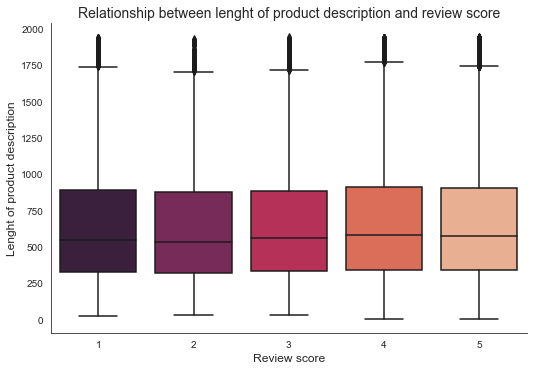

In [17]:
#create a boxplot to examine the distribution of review score with lengt of product description
sns.set_style("white")
sns.catplot(data=unique_orders_filtered, x="review_score", y="product_description_lenght", kind="box", height=5, aspect=1.5, palette="rocket")
plt.title('Relationship between lenght of product description and review score', fontsize=14)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Lenght of product description', fontsize=12)

### Hypothesis 5: Number of photos influences the review score
The assumption is that more photos give more information about the product, and customers know better what to expect. So the review score is higher.

#### Conclusion
When outliers are removed, there seems to be a (weak) relationship between the number of photos available of a product. Less photos is more likely to have a lower review score.

Text(1.1750000000000007, 0.5, 'Number of photos')

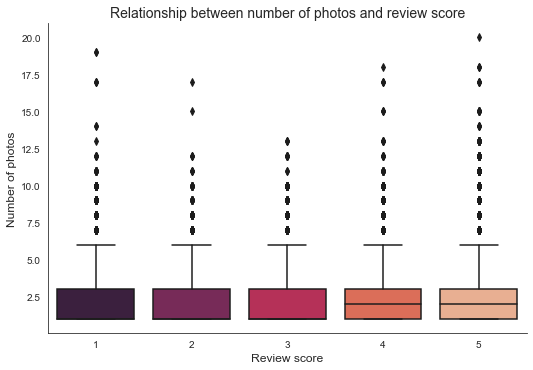

In [18]:
#create a boxplot to examine the distribution of number of photos per review score
sns.set_style("white")
sns.catplot(data=unique_orders, x="review_score", y="product_photos_qty", kind="box", height=5, aspect=1.5, palette="rocket")
plt.title('Relationship between number of photos and review score', fontsize=14)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Number of photos', fontsize=12)

In [19]:
#removing outliers
#IQR is Q3 (75%) - Q1 (25%) 
iqr = (unique_orders['product_photos_qty'].quantile(0.75)) - (unique_orders['product_photos_qty'].quantile(0.25))

#determine lower and upper bound
lower_bound = ((unique_orders['product_photos_qty'].quantile(0.75))) - 1.5 * iqr
upper_bound = ((unique_orders['product_photos_qty'].quantile(0.75))) + 1.5 * iqr

#filter where 'product_photos_qty' is outside bounds
unique_orders_filtered = unique_orders[(unique_orders['product_photos_qty'] > lower_bound) & (unique_orders['product_photos_qty'] < upper_bound)]

In [20]:


#filter where 'product_photos_qty' is outside bounds
unique_orders_filtered = characteristics_reviews[(characteristics_reviews['product_photos_qty'] > lower_bound) & (characteristics_reviews['product_photos_qty'] < upper_bound)]

Text(6.800000000000001, 0.5, 'Number of photos')

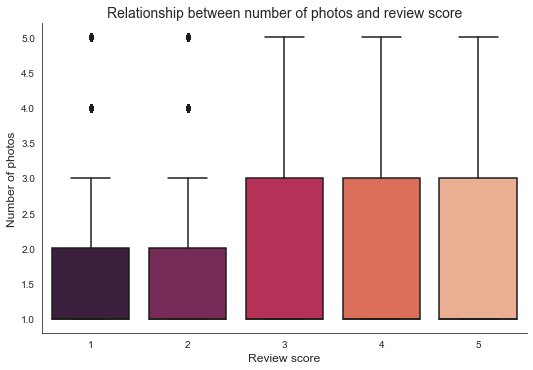

In [21]:
#create a boxplot to examine the distribution of number of photos per review score
sns.set_style("white")
sns.catplot(data=unique_orders_filtered, x="review_score", y="product_photos_qty", kind="box", height=5, aspect=1.5, palette="rocket")
plt.title('Relationship between number of photos and review score', fontsize=14)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Number of photos', fontsize=12)

### Hypothesis 6: Timing of review influences the review score
The assumption is that the sooner after delivery customers write a review, the more critical the review is (and thus a lower score).

#### Conclusion
There seems to be a relation between the timing of review and the review score. The later the review, the higher the score.

Text(0, 0.5, 'Time difference (days)')

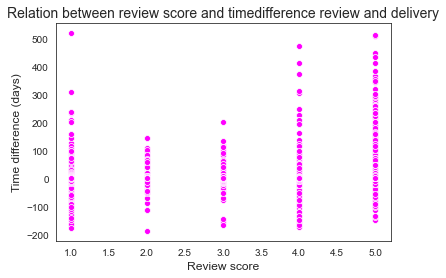

In [22]:
#transform review_answer_timestamp to date/time
unique_orders.review_answer_timestamp = pd.to_datetime(unique_orders.review_answer_timestamp)

#transform order_delivered_customer_date to date/time
unique_orders.order_delivered_customer_date = pd.to_datetime(unique_orders.order_delivered_customer_date)

#Calculate the time difference between delivery and review
unique_orders['Timedifference_deliveryreview'] = unique_orders['review_answer_timestamp'] - unique_orders['order_delivered_customer_date']

#Transform the timedifference to days (float)
unique_orders['Timedifference_deliveryreview_hours'] = unique_orders['Timedifference_deliveryreview'] / np.timedelta64(1, 'h')
unique_orders['Timedifference_deliveryreview_days'] = unique_orders['Timedifference_deliveryreview_hours'] / 24

#create a scatterplot
sns.set_style("white")
sns.scatterplot(data=unique_orders, x="review_score", y="Timedifference_deliveryreview_days", color='magenta')
plt.title('Relation between review score and timedifference review and delivery', fontsize=14)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Time difference (days)', fontsize=12)

Text(6.800000000000001, 0.5, 'Review score')

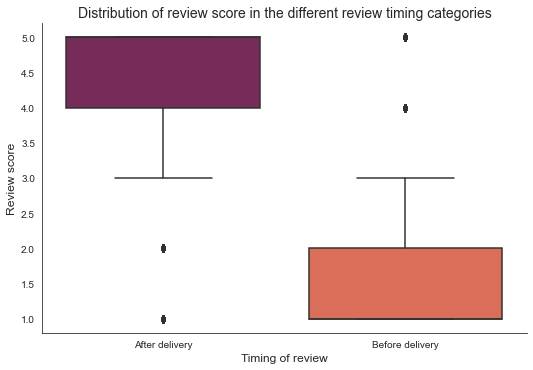

In [26]:
#create an extra column: before and after delivery
unique_orders['reviewtiming'] = ['Before delivery' if x < 0 else 'After delivery' for x in unique_orders['Timedifference_deliveryreview_days']]

#create a boxplot to examine the distribution of review score per time category
sns.set_style("white")
sns.catplot(x="reviewtiming", y="review_score", kind="box", data=unique_orders, height=5, aspect=1.5, palette="rocket")
plt.title('Distribution of review score in the different review timing categories', fontsize=14)
plt.xlabel('Timing of review', fontsize=12)
plt.ylabel('Review score', fontsize=12)